In [18]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

import TCTJE as TRDD

In [19]:
# Пример расчета турбореактивного двухконтурного двигателя

# ИСХОДНЫЕ ДАННЫЕ

# Параметры полета
M_n = 0.7 # Число М полета
H = 1500 # Высота полета, м
P = 4e3 # Тяга, Н

# Параметры двигателя
sigma_vh = 0.97 # К-т восстановления полного давления во вх. устройстве
pi_v_zv = 1.9 # Степень повышения давления в вентиляторе
eta_v = 0.835 # КПД вентилятора
pi_k_zv = 12.5 # Степень повышения полного давления воздуха в компрессоре
eta_k = 0.8 # КПД компрессора
sigma_kc = 0.95 # К-т восстановления полного давления в основной камере сгорания
T_g_zv = 1400 # Температура торможения за камерой сгорания, К
eta_g = 0.99 # К-т полноты сгорания в основной камере
eta_tk_zv = 0.93 #  КПД турбины компрессора
delta_otb = 0.03 # Доля воздуха, отбираемого на охлаждение турбины
eta_mk = 0.995 # Механические КПД турбины компрессора
eta_tv_zv = 0.995 # КПД турбины вентилятора
eta_mv = 0.995 # Механический КПД турбины вентилятора
m = 3 # Степень двухконтурности
sigma_II = 0.960 # К-т восстановления полного давления в наружном контуре
phi_cI = 0.985 # К-т скорости при истечении из сопла внутреннего контура
phi_cII = 0.98 # К-т скорости при истечении из сопла наружного контура
H_u = 42900 # Удельная теплота сгорания керосина, кДж/кг
YEAR = 2023 # Год начала летных испытаний двигателя

In [20]:
# Словарь исходных данных для расчета
init = {'M_n': M_n,
        'H': H,
        'P': P,
        'sigma_vh': sigma_vh,
        'pi_v_zv': pi_v_zv,
        'eta_v': eta_v,
        'pi_k_zv': pi_k_zv,
        'eta_k': eta_k,
        'sigma_kc': sigma_kc,
        'T_g_zv': T_g_zv,
        'eta_g': eta_g,
        'eta_tk_zv': eta_tk_zv,
        'delta_otb': delta_otb,
        'eta_mk': eta_mk,
        'eta_tv_zv': eta_tv_zv,
        'eta_mv': eta_mv,
        'm': m,
        'sigma_II': sigma_II,
        'phi_cI': phi_cI,
        'phi_cII': phi_cII,
        'H_u': H_u,
        'YEAR': YEAR}

In [21]:
res = TRDD.get_params_TRDD(init);

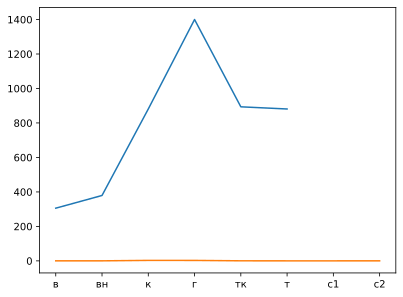

In [22]:
plt.plot(res['T_sections'], res['T_array'])
plt.plot(res['p_sections'], np.array(res['p_array'])/1e6)

In [26]:
P_Mach_H0 = []
P_Mach_H6 = []
P_Mach_H11= []

C_ud_Mach_H0 = []
C_ud_Mach_H6 = []
C_ud_Mach_H11= []

G_v_Mach_H0 = []
G_v_Mach_H6 = []
G_v_Mach_H11= []

Ms = np.linspace(0.1, 0.8, 21)

init['H'] = 0 # высота полета 0 метров
for m in Ms:
    init['M_n'] = m
    P_Mach_H0.append(TRDD.get_params_TRDD(init)['P_ud'])
    C_ud_Mach_H0.append(TRDD.get_params_TRDD(init)['C_ud'])
    G_v_Mach_H0.append(TRDD.get_params_TRDD(init)['G_v'])

init['H'] = 6e3 # высота полета 0 метров
for m in Ms:
    init['M_n'] = m
    P_Mach_H6.append(TRDD.get_params_TRDD(init)['P_ud'])
    C_ud_Mach_H6.append(TRDD.get_params_TRDD(init)['C_ud'])
    G_v_Mach_H6.append(TRDD.get_params_TRDD(init)['G_v'])

init['H'] = 11e3 # высота полета 0 метров
for m in Ms:
    init['M_n'] = m
    P_Mach_H11.append(TRDD.get_params_TRDD(init)['P_ud'])
    C_ud_Mach_H11.append(TRDD.get_params_TRDD(init)['C_ud'])
    G_v_Mach_H11.append(TRDD.get_params_TRDD(init)['G_v'])

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


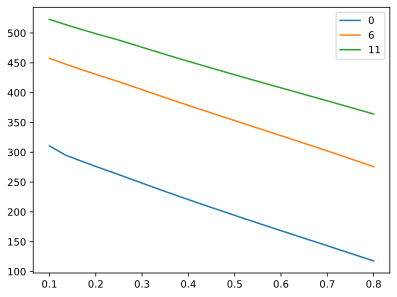

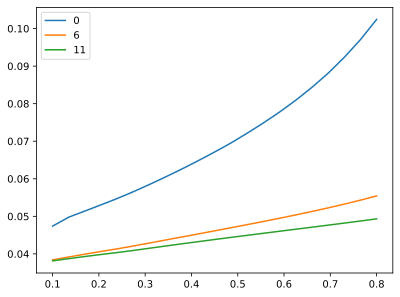

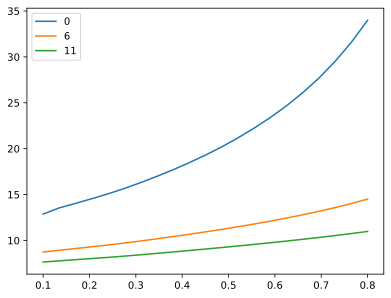

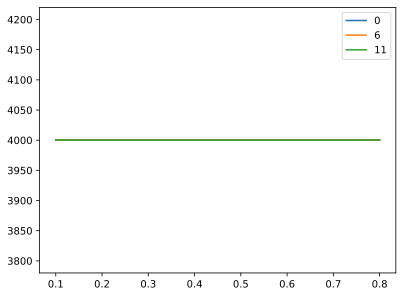

In [29]:
plt.plot(Ms, P_Mach_H0, label = '0')
plt.plot(Ms, P_Mach_H6, label = '6')
plt.plot(Ms, P_Mach_H11, label = '11')

plt.legend(loc = 'best')
plt.show()

plt.plot(Ms, C_ud_Mach_H0, label = '0')
plt.plot(Ms, C_ud_Mach_H6, label = '6')
plt.plot(Ms, C_ud_Mach_H11, label = '11')

plt.legend(loc = 'best')
plt.show()

plt.plot(Ms, G_v_Mach_H0, label = '0')
plt.plot(Ms, G_v_Mach_H6, label = '6')
plt.plot(Ms, G_v_Mach_H11, label = '11')

plt.legend(loc = 'best')
plt.show()

plt.plot(Ms, np.array(P_Mach_H0) * np.array(G_v_Mach_H0), label = '0')
plt.plot(Ms, np.array(P_Mach_H6) * np.array(G_v_Mach_H6), label = '6')
plt.plot(Ms, np.array(P_Mach_H11) * np.array(G_v_Mach_H11), label = '11')

plt.legend(loc = 'best')
plt.show()